<a href="https://colab.research.google.com/github/Nov05/Google-Colaboratory/blob/master/20240208_Deep_Q_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* modified by nov05 on 2024-02-08
* check the original notebook on [github](https://github.com/udacity/deep-reinforcement-learning/tree/master/dqn), the course page on [Udacity](https://learn.udacity.com/nanodegrees/nd893/parts/08363048-48c5-41ee-9c65-764e31a12f73/lessons/dbcf85d1-1deb-4694-a9ef-e6cdb63cd469/concepts/4772186b-ab33-47b6-bd42-f349d602d882)    


---  
  
* github: [Failed building wheel for box2d-py [solved] #32](https://github.com/openai/spinningup/issues/32), Closed  
dingran opened this issue on Nov 12, 2018   
* Deep Reinforcement Learning, 17 JUNE 2016, David Silver  
https://deepmind.google/discover/blog/deep-reinforcement-learning/  
* DQN Learns Snake And Wins!  
https://www.youtube.com/watch?v=G8NEj5InvVA  


In [1]:
# !pip uninstall -y gym ## colab pre-installed 0.25.2
# !pip install gym==0.9.6
!pip install swig ## Successfully installed swig-4.2.0
!pip install gym[box2d] ## Successfully installed box2d-py-2.3.5 pygame-2.1.0
!pip install pyvirtualdisplay
!apt-get install -y xvfb
## restart the session "Ctrl+M."

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.3 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376172 sha256=b789d73bb3214e8ab67ccdc4b792a3e1a5cd82ad54649b699b9d709791206ac9
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.5.2
    Uninstalling pygame-2.5.2:
      Successfully uninstalled pygame-2.5.2
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
!which python
!python --version ## 3.10.12
import gym, torch
print(f"gym {gym.__version__}") ## 0.25.2
print(f"torch {torch.__version__}") ## 2.1.0+cu121

/usr/local/bin/python
Python 3.10.12
gym 0.25.2
torch 2.1.0+cu121


In [ ]:
!nvidia-smi

Thu Feb  8 20:20:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Deep Q-Network (DQN)**  
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### **1. Import the Necessary Packages**  

In [4]:
import gym
import random
import torch
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **2. Instantiate the Environment and Agent**

Initialize the environment in the code cell below.

In [5]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together,
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)  

👉 Pytorch DQN example  
https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html    

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        "*** YOUR CODE HERE ***"
        self.layer1 = nn.Linear(state_size, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.layer1(state))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

<img src='https://raw.githubusercontent.com/Nov05/pictures/master/Udacity/20231221_reinforcement%20learning/2024-02-08%2010_29_43-Deep%20Q-Networks-min.jpg' width=700>

In [7]:
import numpy as np
import random
from collections import namedtuple, deque

# from model import QNetwork ## local import

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.

        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.

        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.
        target_j = reward_j + gamma * max_a ()

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        ## TODO: compute and minimize the loss
        "*** YOUR CODE HERE ***"
        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

### **Watch an Untraied Agent**

In [8]:
# from dqn_agent import Agent ## local import
agent = Agent(state_size=8, action_size=4, seed=0)
for param in list(agent.qnetwork_local.parameters()):
    print(param.shape)

torch.Size([128, 8])
torch.Size([128])
torch.Size([128, 128])
torch.Size([128])
torch.Size([4, 128])
torch.Size([4])


Actions: 67, Score: -83.18756786478407
CPU times: user 4.52 s, sys: 1.21 s, total: 5.73 s
Wall time: 4.38 s


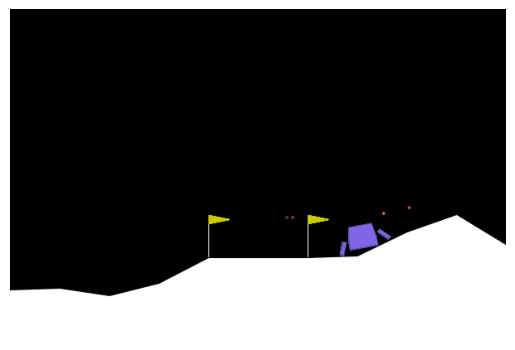

In [9]:
%%time
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
score = 0
for t in range(1000):
    action = env.action_space.sample() ## equiprobable random policy
    img.set_data(env.render(mode='rgb_array'))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    score += reward
    if done:
        print(f'Actions: {t+1}, Score: {score}')
        break
env.close()
## Actions: 94, Score: -130.9334571365314

### **3. Train the Agent with DQN**  

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

In [ ]:
%%time
import sys

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    score_max = float('-inf')
    is_solved = False
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done) ## learn every UPDATE_EVERY = 4 steps
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100==0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        scores_mean = np.mean(scores_window)
        if scores_mean>=200.0 and scores_mean>score_max:
            score_max = scores_mean
            if not is_solved:
                is_solved = True
                print('\nEnvironment solved in {:d} episodes!'.format(i_episode-100))
            print("\nCheckpoint is saved at episode {:d}, average score: {:.2f}".format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), f'checkpoint_{i_episode}.pth')
    return scores

scores = dqn()
## Tesla T4, conv_128_128:
## Environment solved in 681 episodes!	Average Score: 202.76, Wall time: 16min 12s
## 2000 epochs, Wall time: 24 min, Environment solved in 1769 episodes!	Average Score: 267.65

In [ ]:
## remove all the checkpoint files
# !rm checkpoint_*

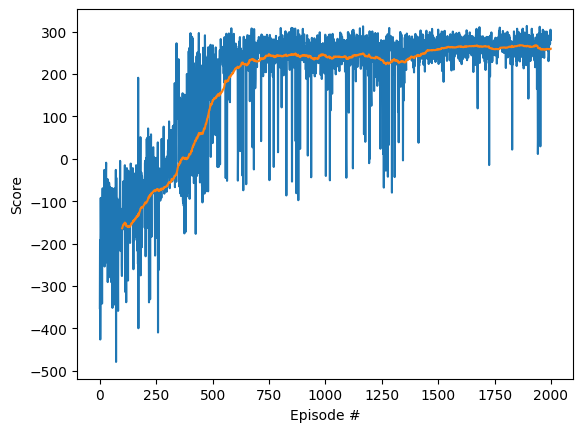

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), pd.DataFrame(scores).rolling(window=100).mean())
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
## code explain
gamma = 0.99
states, actions, rewards, next_states, dones = agent.memory.sample() ## get experiences
print("states:", states.shape)
agent.qnetwork_local.eval()
agent.qnetwork_target.eval()
with torch.no_grad():
    ## Get max predicted Q values (for next states) from target model
    Q_targets_next = agent.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
    print("agent.qnetwork_target(next_states).detach():", agent.qnetwork_target(next_states).detach().shape)
    ## Compute Q targets for current states
    Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
    ## Get expected Q values from local model
    Q_expected = agent.qnetwork_local(states).gather(1, actions)
    print("Q_targets_next:", Q_targets_next.shape)
    print("Q_targets:", Q_targets.shape)

states: torch.Size([64, 8])
agent.qnetwork_target(next_states).detach(): torch.Size([64, 4])
Q_targets_next: torch.Size([64, 1])
Q_targets: torch.Size([64, 1])


### **4. Watch a Smart Agent!**

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [18]:
## download the pre-trained q-network weights
import gdown
gdown.download("https://drive.google.com/uc?id=1akuCP1_CTJ3K7OgC9Qi53ySe377FFMRE", "checkpoint.pth")

Downloading...
From: https://drive.google.com/uc?id=1akuCP1_CTJ3K7OgC9Qi53ySe377FFMRE
To: /content/checkpoint.pth
100%|██████████| 75.6k/75.6k [00:00<00:00, 100MB/s]


'checkpoint.pth'

Actions: 247, Score: 291.5597727285765
CPU times: user 2min 41s, sys: 1.35 s, total: 2min 42s
Wall time: 2min 40s


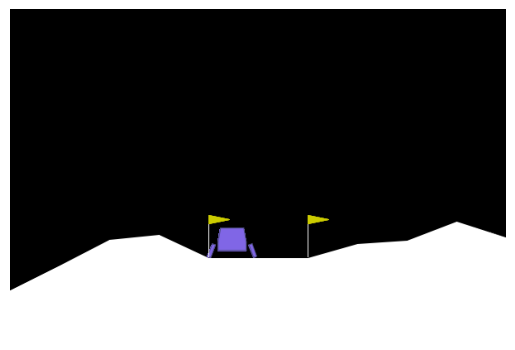

In [24]:
%%time
# load the weights from file
# from dqn_agent import Agent
agent_new = Agent(state_size=8, action_size=4, seed=0)
agent_new.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
img = plt.imshow(env.render(mode='rgb_array'))

n_episodes_new = 10
actions_new, scores_new, dones_new = [], [], 0
for i in range(n_episodes_new):
    state = env.reset()
    score = 0
    for j in range(1000):
        action = agent_new.act(state)
        img.set_data(env.render(mode='rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        score += reward
        if done:
            actions_new.append(j+1)
            scores_new.append(score)
            dones_new += 1
            print(f'Actions: {j+1}, Score: {score}')
            break
    env.close()

In [25]:
print(f"{dones_new} in {n_episodes_new} episodes are done.")
print(f"{np.sum(np.array(scores_new)>=200)} in {n_episodes_new} episodes are successful.")
print("scores:", np.round(scores_new, 2))
print(f"average score: {np.round(np.sum(scores_new)/n_episodes_new, 2)}")

10 in 10 episodes are done.
10 in 10 episodes are successful.
scores: [299.06 254.32 255.63 294.25 244.55 263.51 289.57 295.17 255.16 291.56]
average score: 274.28


* a example of the results:  
```
10 in 10 episodes are done.
9 in 10 episodes are successful.
scores: [218.75 281.31 238.16 238.52 276.34 232.34 210.27 292.39 258.15  56.46]
average score: 230.27
```

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN!
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  